<a href="https://colab.research.google.com/github/GabCopetti/Chest-X-Rays-Binary-Classification/blob/main/Chest_XRays_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Analysis

## Setting up environment

### Installations

*Only for Google Colab.*

In [1]:
#Installing specific Python version
!sudo apt-get install python3.10
!python --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Python 3.10.12


In [2]:
#Disabling output
%%capture
#Installing datasets
!pip install datasets==2.20.0
!pip install matplotlib==3.7.1
!pip install pandas==2.1.0
!pip install numpy==1.24.3

### Importing libraries

In [3]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datasets import load_dataset

## Loading dataset

In [4]:
#Downloading the chest-xray-classification dataset in full, with train, validation and test splits.
train_dataset = load_dataset("keremberke/chest-xray-classification", "full", split="train")
valid_dataset = load_dataset("keremberke/chest-xray-classification", "full", split="validation")
test_dataset  = load_dataset("keremberke/chest-xray-classification", "full", split="test")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4077 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/582 [00:00<?, ? examples/s]

## EDA

***
The dataset is already split into Train, Validation and Test subsets.
***

In [5]:
#Having a look at the shape of each subset
train_dataset.shape, valid_dataset.shape, test_dataset.shape

((4077, 3), (1165, 3), (582, 3))

In [6]:
#Sample
train_dataset[0]

{'image_file_path': '/storage/hf-datasets-cache/all/datasets/60340657865253-config-parquet-and-info-keremberke-chest-xray-cla-9d66ea8b/downloads/extracted/8202f7dd6f1edf5e674abe75990eb233fbbca4408e132a3acd5268bd99708e15/NORMAL/IM-0003-0001_jpeg.rf.3fffcf9c33575f8f928b017484f99a64.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x640>,
 'labels': 0}

***
Train, validation and test datasets have 4077, 1165 and 582 entries, respectively.

The dataset is composed of a list of dictionaries, with 3 keys: image_file_path, image, and labels.

Image is in PIL format.
***

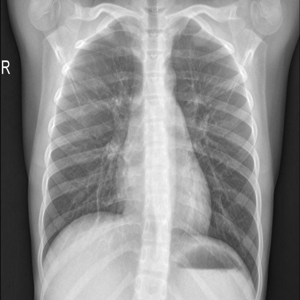

In [7]:
#Image from sample
train_dataset[0]['image'].resize((300,300))

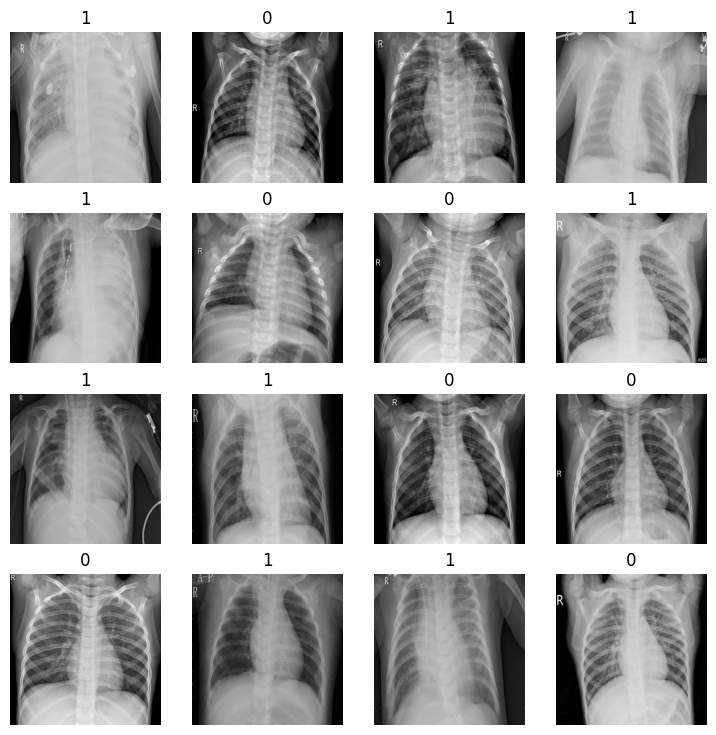

In [8]:
# Plot more images
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = np.random.randint(0, len(train_dataset))
    img = train_dataset[random_idx]['image']
    label = train_dataset[random_idx]['labels']
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)
    plt.title(label)
    plt.axis(False);

In [9]:
#Converting datasets to pandas dataframe
df_train = train_dataset.to_pandas()
df_valid = valid_dataset.to_pandas()
df_test  = test_dataset.to_pandas()
df_train

,image_file_path,image,labels
0,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
1,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
3,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
4,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
...,...,...,...
4072,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4073,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4074,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1
4075,/storage/hf-datasets-cache/all/datasets/603406...,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1


In [10]:
#Checking for duplicates
df_train.astype(str).duplicated().sum(), df_valid.astype(str).duplicated().sum(), df_test.astype(str).duplicated().sum()

(0, 0, 0)

In [11]:
#Checking for empty values
df_train.isna().sum(), df_valid.isna().sum(), df_test.isna().sum()

(image_file_path    0
 image              0
 labels             0
 dtype: int64,
 image_file_path    0
 image              0
 labels             0
 dtype: int64,
 image_file_path    0
 image              0
 labels             0
 dtype: int64)

***
There are no duplicates or empty values in the datasets.
***

In [12]:
#Checking how many entries of each label there are in the datasets
df_train.labels.value_counts(), df_valid.labels.value_counts(), df_test.labels.value_counts()

(labels
 1    2973
 0    1104
 Name: count, dtype: int64,
 labels
 1    861
 0    304
 Name: count, dtype: int64,
 labels
 1    411
 0    171
 Name: count, dtype: int64)

***
The images are labelled either 0 or 1. We know from the dataset description that 0 corresponds to:

0 : NORMAL

1 : PNEUMONIA

according to the [dataset page](https://huggingface.co/datasets/keremberke/chest-xray-classification
) on Hugging Face.

We can see that the dataset is **imbalanced**, with more images with label 1 than with label 0.
***

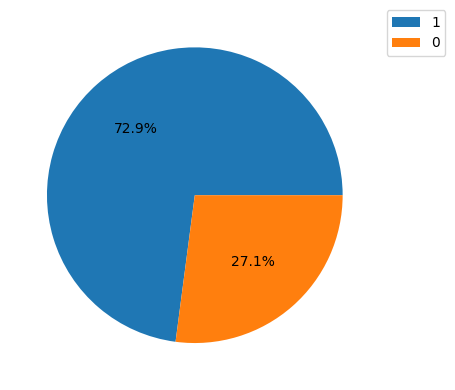

In [13]:
ax = df_train.labels.value_counts().plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

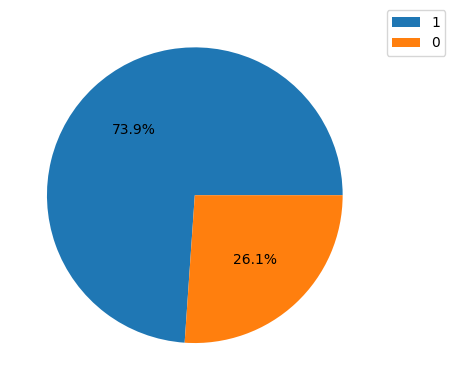

In [14]:
ax = df_valid.labels.value_counts().plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

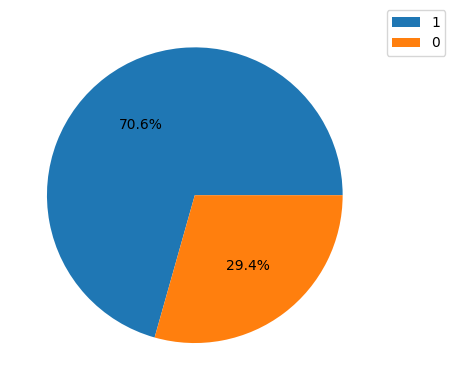

In [15]:
ax = df_test.labels.value_counts().plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

***
We can see above that the 0/1 proportion stays farly the same in each slice of the dataset, with the test dataset containing slightly more 0s than the train and validation datasets.
***